# EDA-Project: Houses to rent

Making EDA for renting houses by file: ```"houses_to_rent.csv"```

# 1) Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import os
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2) Let's read the file and get general information

In [2]:
rent=pd.read_csv('houses_to_rent.csv')
rent.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [3]:
rent.shape

(6080, 14)

In [4]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [5]:
rent.describe()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces
count,6080.00000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,3039.50000,0.863322,151.143914,2.492599,2.341612,1.756250
std,1755.28915,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.00000,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1519.75000,1.000000,58.000000,2.000000,1.000000,1.000000
50%,3039.50000,1.000000,100.000000,3.000000,2.000000,1.000000
75%,4559.25000,1.000000,200.000000,3.000000,3.000000,2.000000
max,6079.00000,1.000000,24606.000000,10.000000,10.000000,12.000000


# 3) Data pre-processing

Removing the first column as it is repeating the index

In [6]:
rent.drop("Unnamed: 0", axis=1, inplace=True)
rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


We change the values of the columns that show the amount for digital data and change the column with the city, where 1 means the city

In [7]:
rent["city"]=rent["city"].replace(1, "city")
rent["city"]=rent["city"].replace(0, "not city")

In [8]:
for i in rent[rent["floor"]=="-"].index:
    rent["floor"][i]=(rent["floor"][i].replace("-", "0"))

c:\users\user\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
for col in ["hoa", "rent amount", "property tax", "fire insurance"]:
    for i in rent[col].index:
        if rent[col][i]=="Incluso":
            rent[col][i] = rent[col][i].replace("Incluso","R$0")
#Incluso means inclusive, so we can change its value to 0

c:\users\user\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
rent = rent[rent["hoa"]!="Sem info"]
rent.dropna()
#Sem info means that there is no information on this line, so we can simply delete these lines

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,city,240,3,3,4,0,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,not city,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,city,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,city,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,city,19,1,1,0,0,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,city,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,city,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,not city,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,city,160,3,2,2,0,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [11]:
for col in ["hoa", "rent amount", "property tax", "fire insurance", "total"]:
    for i in rent[col].index:
        rent[col][i]=((rent[col][i].split("$")[1]))
        if "," in rent[col][i]:
            rent[col][i] = rent[col][i].replace(",", "")
    rent[col]=rent[col].astype(int)
rent["floor"]=rent["floor"].astype(int)

c:\users\user\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,city,240,3,3,4,0,acept,furnished,0,8000,1000,121,9121
1,not city,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,city,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,city,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,city,19,1,1,0,0,not acept,not furnished,0,1200,41,16,1257


In [13]:
rent.describe()

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,150.382318,2.487334,2.337527,1.745345,5.778225,1110.154840,4387.578426,493.610804,57.932226,6049.667170
std,378.646470,1.123221,1.435813,1.583760,6.178970,4017.906783,3572.216210,6273.856426,49.153500,8818.732461
min,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1.000000,180.000000,1800.000000,34.000000,23.000000,2469.000000
50%,100.000000,3.000000,2.000000,1.000000,4.000000,670.000000,3100.000000,145.000000,40.000000,4127.000000
75%,198.000000,3.000000,3.000000,2.000000,9.000000,1480.000000,5900.000000,459.000000,77.000000,8080.000000
max,24606.000000,10.000000,10.000000,12.000000,99.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


# 4) Data visualization

Plotting a graph showing the number of houses: located in the city or not; for animals: allowed or not; is there furniture or not

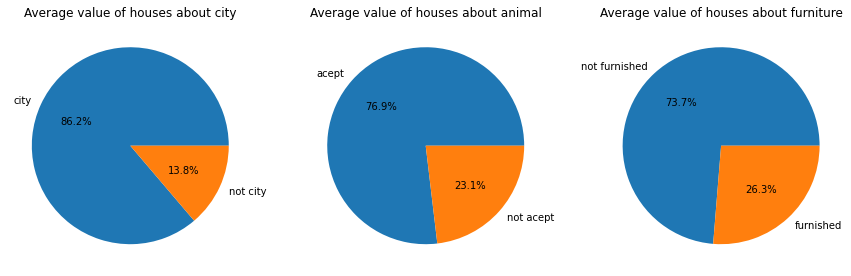

In [14]:
plt.rcParams["figure.figsize"]=(15,15)
fig, axs = plt.subplots(1,3)
axs[0].pie(x=rent["city"].value_counts(), labels=rent["city"].value_counts().index, autopct=lambda x:f"{x:.1f}%");
axs[0].set_title("Average value of houses about city");
axs[1].pie(x=rent["animal"].value_counts(), labels=rent["animal"].value_counts().index, autopct=lambda x:f"{x:.1f}%");
axs[1].set_title("Average value of houses about animal");
axs[2].pie(x=rent["furniture"].value_counts(), labels=rent["furniture"].value_counts().index, autopct=lambda x:f"{x:.1f}%");
axs[2].set_title("Average value of houses about furniture");

Plotting a graph showing the number of houses with different indicators

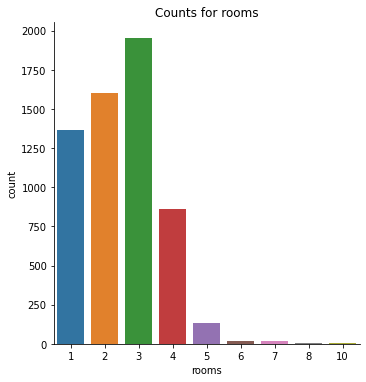

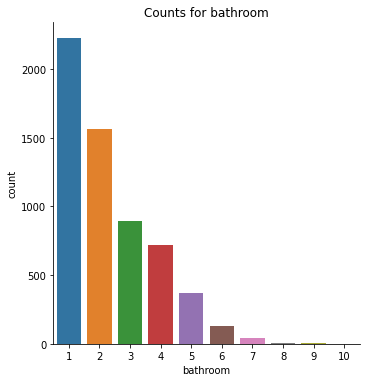

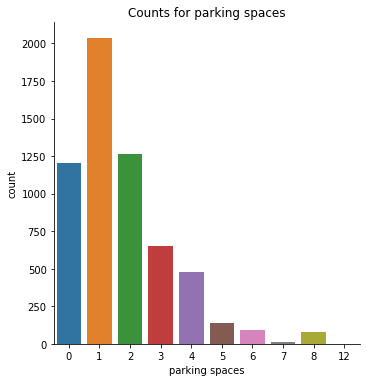

In [15]:
plt.rcParams["figure.figsize"]=(5,5)
count_list=["rooms", "bathroom", "parking spaces"]
for i in count_list:
    fg = sns.catplot(x=i, kind="count", data=rent);
    fg.ax.set_title(f"Counts for {i}")

Plotting a graph of the average amount on whether the house is in the city or not with different indicators

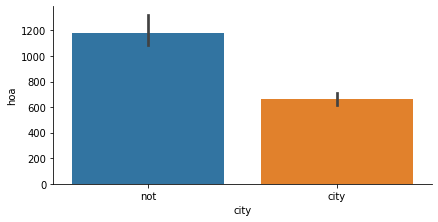

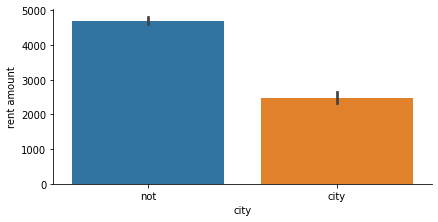

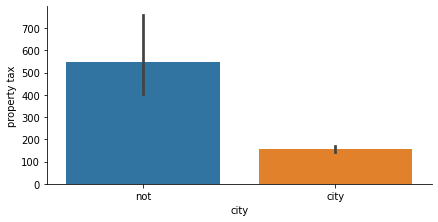

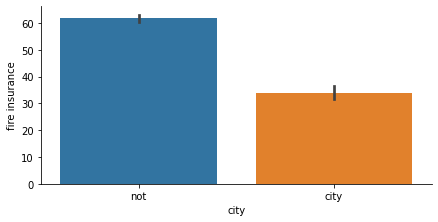

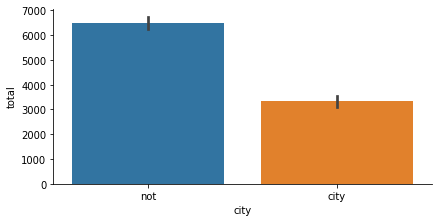

In [16]:
amounts = ["hoa", "rent amount", "property tax", "fire insurance", "total"]
for i in amounts:
    g = sns.catplot(x="city",y=i, kind="bar", height=3, aspect=2, data=rent);
    g.set_xticklabels(["not", "city"]);
#The total average price for whether the house is in the city or not

Let's find the connection between the number of rooms and bathrooms

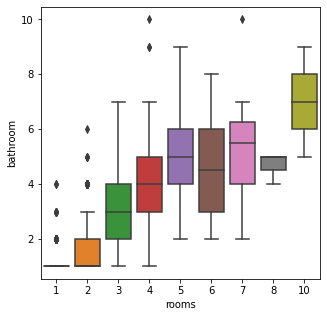

In [17]:
sns.boxplot(x="rooms", y="bathroom", data=rent);

Visualizing the correlation

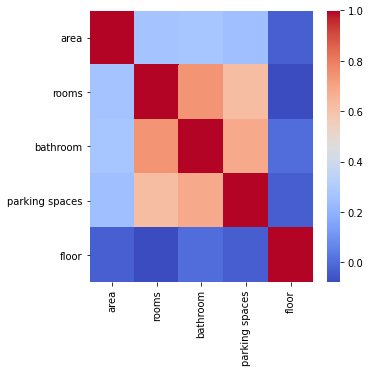

In [18]:
sns.heatmap(rent[["area", "rooms","bathroom","parking spaces","floor"]].corr(), cmap="coolwarm");

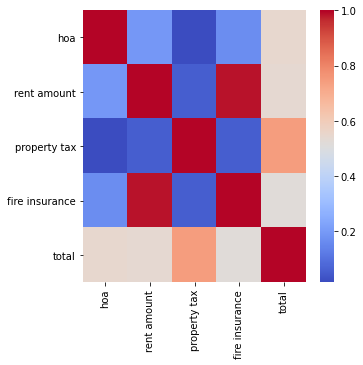

In [19]:
sns.heatmap(rent[["hoa","rent amount","property tax","fire insurance","total"]].corr(), cmap="coolwarm");

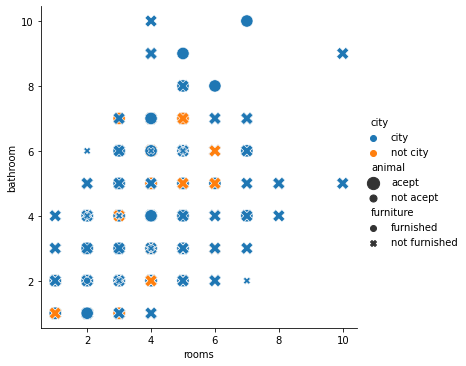

In [20]:
sns.relplot(x="rooms", y="bathroom", hue="city", size="animal", sizes=(50,150),
            style="furniture", data=rent);

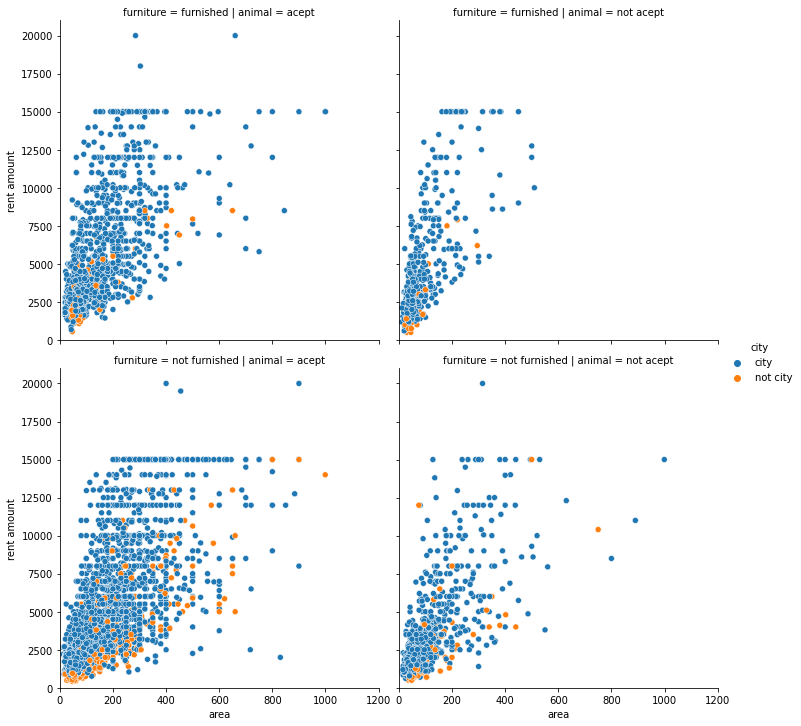

In [21]:
sns.relplot(data=rent, x="area", y="rent amount", hue="city", col="animal", row="furniture");
plt.xlim(0,1200);
plt.ylim(0,21000);
#there are only 3 values on the x-axis that exceed the area of 1200, we consider them anomalous and don't take them into 
#account, and we do the same on the y-axis

# 5) Getting statistical data

Let's find where the most expensive rental house is located and in total, we will do the same for the cheapest house

In [22]:
most_expensive = rent[rent["rent amount"]==rent["rent amount"].max()]
print(f"The most expensive house to rent is located in {most_expensive['city'].values[0]}, amount is {rent['rent amount'].max()}")
chippest_rent = rent[rent["rent amount"]==rent["rent amount"].min()]
print(f"The chippest house to rent is located in {chippest_rent['city'].values[0]}, amount is {rent['rent amount'].min()}")
most_expensive_total = rent[rent["total"]==rent["total"].max()]
print(f"The most expensive total of house is located in {most_expensive_total['city'].values[0]}, amount is {rent['total'].max()}")
chippest_total = rent[rent["rent amount"]==rent["rent amount"].min()]
print(f"The chippest total of house is located in {chippest_total['city'].values[0]}, amount is {rent['total'].min()}")

The most expensive house to rent is located in city, amount is 45000
The chippest house to rent is located in not city, amount is 420
The most expensive total of house is located in city, amount is 372700
The chippest total of house is located in not city, amount is 660


Let's see if there is furniture in the most expensive house and if it is possible to live there with animals, we do the same for a cheap house

In [23]:
print(f"In the most expensive house to rent animals are {most_expensive['animal'].values[0]}ed and it's {most_expensive['furniture'].values[0]}")
print(f"In the chippest house to rent animals are {chippest_rent['animal'].values[0]}ed and it's {chippest_rent['furniture'].values[0]}")
print(f"In the most expensive total of house animals are {most_expensive_total['animal'].values[0]}ed and it's {most_expensive_total['furniture'].values[0]}")
print(f"In the chippest total of house animals are {chippest_total['animal'].values[0]}ed and it's {chippest_total['furniture'].values[0]}")

In the most expensive house to rent animals are acepted and it's not furnished
In the chippest house to rent animals are acepted and it's not furnished
In the most expensive total of house animals are not acepted and it's furnished
In the chippest total of house animals are acepted and it's not furnished


Let's find the number of rooms in the most expensive house and the number of bathrooms, we do the same for the cheapest house

In [24]:
print(f"In the most expensive house to rent are {most_expensive['rooms'].values[0]} rooms and {most_expensive['bathroom'].values[0]} bathrooms")
print(f"In the chippest house to rent are {chippest_rent['rooms'].values[0]} rooms and {chippest_rent['bathroom'].values[0]} bathrooms")
print(f"In the most expensive total of house are {most_expensive_total['rooms'].values[0]} rooms and {most_expensive_total['bathroom'].values[0]} bathrooms")
print(f"In the chippest total of house are {chippest_total['rooms'].values[0]} rooms and {chippest_total['bathroom'].values[0]} bathrooms")

In the most expensive house to rent are 4 rooms and 7 bathrooms
In the chippest house to rent are 1 rooms and 1 bathrooms
In the most expensive total of house are 3 rooms and 3 bathrooms
In the chippest total of house are 1 rooms and 1 bathrooms


Let's find the number of parking spaces in the most expensive house and the total area of the house, we do the same for a cheap house

In [25]:
print(f"In the most expensive house to rent area is {most_expensive['area'].values[0]} and {most_expensive['parking spaces'].values[0]} parking spaces")
print(f"In the chippest house to rent area is {chippest_rent['area'].values[0]} and {chippest_rent['parking spaces'].values[0]} parking spaces")
print(f"In the most expensive total of house area is {most_expensive_total['area'].values[0]} and {most_expensive_total['parking spaces'].values[0]} parking spaces")
print(f"In the chippest total of house area is {chippest_total['area'].values[0]} and {chippest_total['parking spaces'].values[0]} parking spaces")

In the most expensive house to rent area is 700 and 8 parking spaces
In the chippest house to rent area is 47 and 0 parking spaces
In the most expensive total of house area is 93 and 0 parking spaces
In the chippest total of house area is 47 and 0 parking spaces


Let's find the number of houses that are in the city and outside

In [26]:
print(f'In city there are located {rent["city"].value_counts()["city"]} houses')
print(f'In not city there are located {rent["city"].value_counts()["not city"]} houses')

In city there are located 5140 houses
In not city there are located 821 houses


Let's find the columns that are most correlated with the total

In [27]:
rent.corr()['total'].sort_values(ascending=False)

total             1.000000
property tax      0.742989
hoa               0.547508
rent amount       0.540728
fire insurance    0.522754
bathroom          0.385146
parking spaces    0.314286
rooms             0.307579
area              0.138957
floor             0.093907
Name: total, dtype: float64